<IPython.core.display.Javascript object>


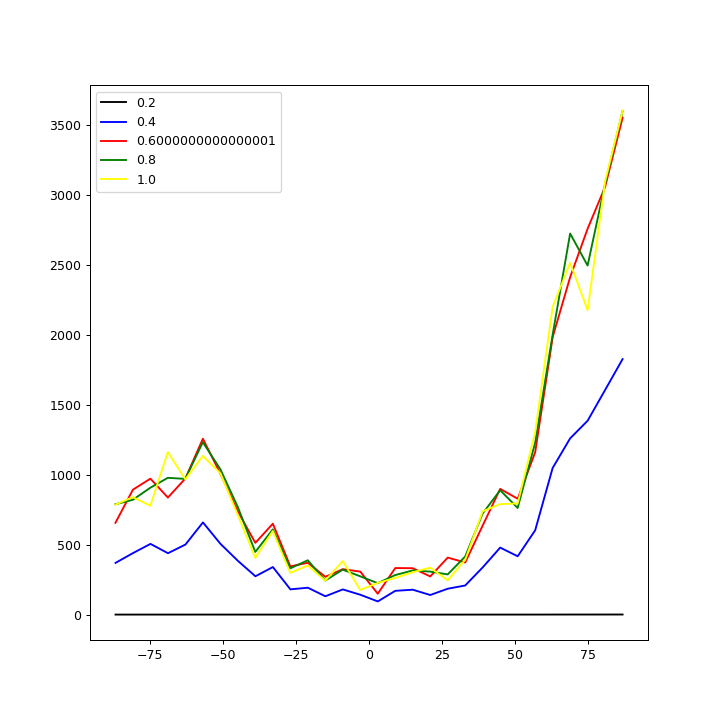

In [135]:
# coding: utf-8

# # Notebook to plot multiwavelength vectors on maps from J. Bally, DC, 12/20/17
# 

# ## APO 3.5 meter H2 map

# In[1]:

from __future__ import division
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs

import numpy as np
from matplotlib.colors import SymLogNorm, LogNorm
from astropy.coordinates import SkyCoord
from scipy import ndimage
#from HAWCplot import HAWC_footprint
#from IPython.display import display, Math, Latex #For Latex math symbols

import numpy as np

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

file1 = './current_fits/F0450_HA_POL_unk5_HAWDHWPD_PMP_043-118.fits'

%matplotlib notebook
#This is the mapfile
#mapfile = "OrionH2_NICFPS_cropped.fits"


# Read a map file and extract the WCS information

# In[3]:


#read in image
#fits_file = fits.open(mapfile)
#data=fits_file[0].data
#w=wcs.WCS(fits_file[0].header) #wcs information


# Read in polarization information. The HDU list for polarimetry is as follows:
# 
# 0: Stokes I  
# 1: I error  
# 2: Q  
# 3: Q error  
# 4: U  
# 5: U error  
# 6: Image Mask  
# 7: Percent Pol  
# 8: Percent Pol (debiased)  
# 9: Pol error  
# 10: Pol angle  
# 11: Pol Angle (B-field)  
# 12: Angle error  
# 13: Merged data  

# In[4]:


#read in polarization data for Band A
polfile=fits.open(file1)
w2=wcs.WCS(polfile[0].header)
xpix=polfile[0].header['NAXIS1']
ypix=polfile[0].header['NAXIS2']
data1 = polfile[0].data
polvec = polfile[11].data 

# In[5]:


#replace non-positive values in image with a small value so we can plot on a log scale.
#data=np.nan_to_num(data)


# In[ ]:

# In[ ]:
plt.figure(figsize=(8,8))
sig = [0.2*(j+1) for j in range(5)]
colors = ['k','b','r','g','yellow']

for j,k in zip(sig,colors):
    #plot the whole thing.
    #plt.figure(figsize=(8,8))
    #plt.imshow(np.log10(data1), origin='lower',interpolation='gaussian',cmap=plt.cm.Greys)#,norm=SymLogNorm(linthresh=1600.0, linscale=1,vmin=1.0,vmax=70000))
    #plt.hist(np.log10(data))
    #print data.shape
    deriv_0 = ndimage.gaussian_filter1d(data1,j,axis=0,order=1)
    #plt.imshow(deriv_0, origin='lower',interpolation='gaussian',cmap=plt.cm.Greys)
    #
    #plt.figure(figsize=(8,8))
    deriv_1 = ndimage.gaussian_filter1d(data1,j,axis=1,order=1)
    #plt.imshow(deriv_1, origin='lower',interpolation='gaussian',cmap=plt.cm.Greys)
    #
    #plt.figure(figsize=(8,8))
    grad = np.sqrt(deriv_0**2 + deriv_1**2)
    #plt.imshow(np.log10(grad), origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
    #
    #plt.figure(figsize=(8,8))
    angle = np.arctan2(deriv_0,deriv_1)
    angle = angle*(180./np.pi)
    #plt.imshow(angle, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
    #
    dphi = angle -  polvec
    dphi = dphi.flatten()
    grad = grad.flatten()
    m = np.where(np.isnan(dphi) == False)
    dphi = dphi[m]
    grad = grad[m]
    for i in enumerate(dphi):
        if i[1] > 90:
            dphi[i[0]] = 180. - i[1]
        elif i[1] < -90:
            dphi[i[0]] = 180 + i[1]
    #
    #dphi = dphi/grad
    hist, bins = np.histogram(dphi,bins=30, weights = grad)
    center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
    hist = plt.plot(center,hist,color=k,label=str(j))
    #plt.colorbar()
plt.legend()
plt.show()

In [2]:
deriv_0 = ndimage.gaussian_filter1d(data1,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(data1,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
dphi = abs(angle -  polvec)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

(22436,) (22436,)
(7018,) (7018,)


plt.figure()
plt.hist(dphi, weights = grad)
plt.show()

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.show()

plt.figure(figsize=(8,8))
dphi = abs(angle -  polvec)
plt.imshow(dphi, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(angle, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

plt.figure(figsize=(8,8))
plt.imshow(polvec, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


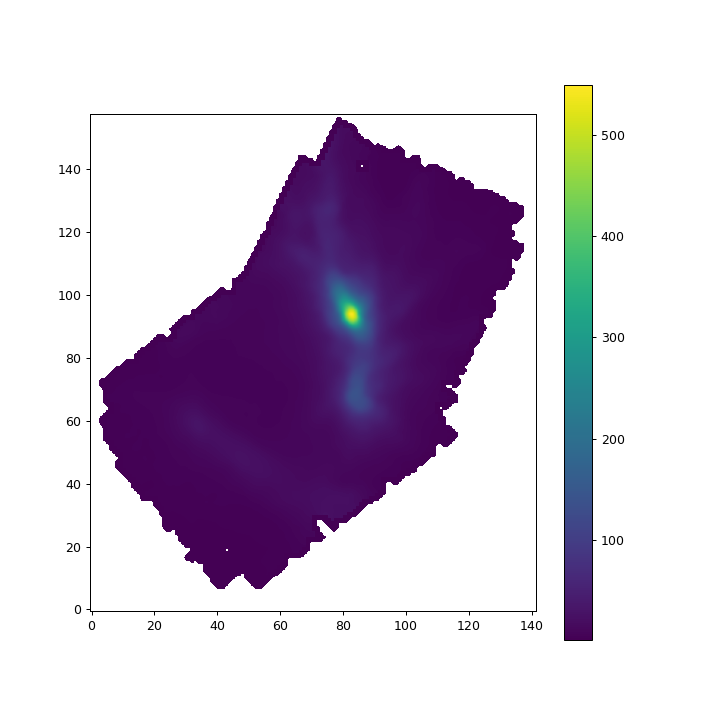

In [136]:
plt.figure(figsize=(8,8))
plt.imshow(data1, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.colorbar()
plt.show()

x = data1[:70]
x.shape

deriv_0 = ndimage.gaussian_filter1d(x,5,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(x,5,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
polvec1 = polvec[:70]
dphi = abs(angle -  polvec1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.show()

x = data1[70:110]
x.shape

deriv_0 = ndimage.gaussian_filter1d(x,5,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(x,5,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
polvec1 = polvec[70:110]
dphi = abs(angle -  polvec1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.show()

In [3]:
xpix

142

In [4]:
ypix

158

In [5]:
data1.shape

(158, 142)

In [6]:
np.nanmin(data1)

0.76824074314864821

In [7]:
np.nanmax(data1)

549.52626894947923

In [8]:
data1

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

<IPython.core.display.Javascript object>


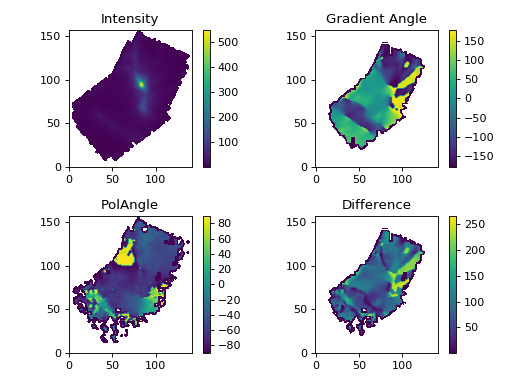

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [9]:
plt.figure()
plt.subplot(221)
plt.imshow(data1, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.title("Intensity")
plt.colorbar()

plt.subplot(222)
plt.imshow(angle, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.title("Gradient Angle")
plt.colorbar()

plt.subplot(223)
plt.imshow(polvec, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.title("PolAngle")
plt.colorbar()

plt.subplot(224)
dphi = abs(angle -  polvec)
plt.imshow(dphi, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.title("Difference")
plt.colorbar()
plt.tight_layout()
plt.show()
plt.savefig("All_maps1.pdf")


(300,) (300,)
(300,) (300,)


<IPython.core.display.Javascript object>


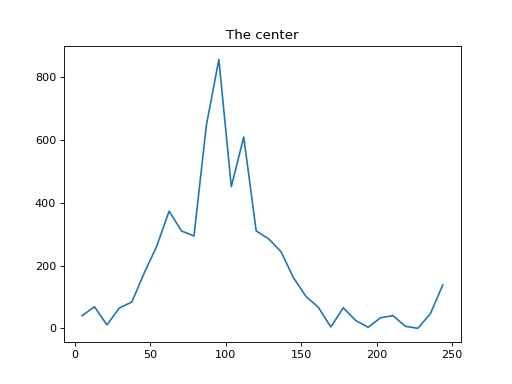

In [10]:
x = data1[85:105, 75:90]
x.shape

deriv_0 = ndimage.gaussian_filter1d(x ,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(x,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
polvec1 = polvec[85:105, 75:90]
dphi = abs(angle -  polvec1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.show()
plt.title("The center")
plt.savefig("Center1.pdf")

(900,) (900,)
(892,) (892,)


<IPython.core.display.Javascript object>


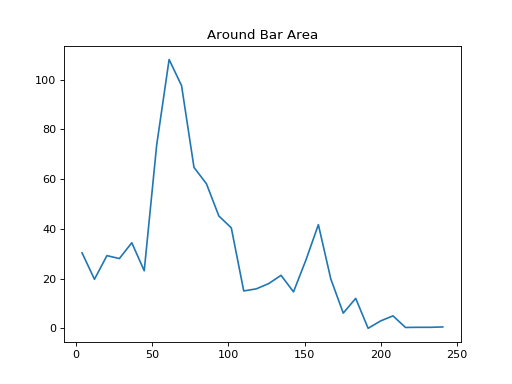

In [11]:
x = data1[40:70, 30:60]
x.shape

deriv_0 = ndimage.gaussian_filter1d(x,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(x,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
polvec1 = polvec[40:70, 30:60]
dphi = abs(angle -  polvec1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.title("Around Bar Area")
plt.show()
plt.savefig("Bar_Area1.pdf")

(750,) (750,)
(749,) (749,)


<IPython.core.display.Javascript object>


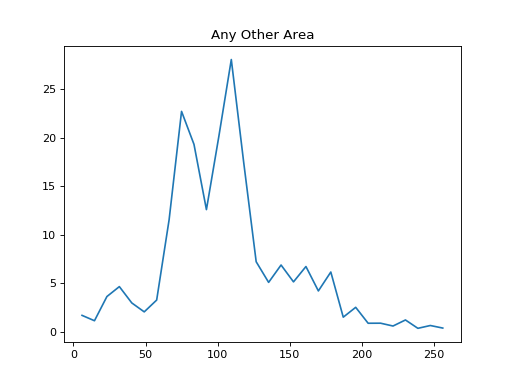

In [12]:
x = data1[65:95, 40:65]
x.shape

deriv_0 = ndimage.gaussian_filter1d(x,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(x,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
polvec1 = polvec[65:95, 40:65]
dphi = abs(angle -  polvec1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi ,bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.title("Any Other Area")
plt.show()
plt.savefig("Other1.pdf")

In [13]:
x, y = np.meshgrid(np.arange(data1.shape[1]), np.arange(data1.shape[0]))

In [14]:
mask1 = ((x>=40) & (x<65))[0] 
mask2 = (y>=65) & (y<95)

In [15]:
data1.shape

(158, 142)

In [16]:
mask1.shape

(142,)

In [17]:
mask2.shape

(158, 142)

In [18]:
y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ..., 
       [155, 155, 155, ..., 155, 155, 155],
       [156, 156, 156, ..., 156, 156, 156],
       [157, 157, 157, ..., 157, 157, 157]])

In [19]:
data1

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [ ]:
from matplotlib.path import Path

nx, ny = 414, 376
poly_verts = [(161.13, 144.36),(166.79, 145.17),(188.62, 130.61),
              (204.79, 118.48),(214.50, 123.34),(215.31, 118.48),
              (225.00, 114.44),(229.05, 101.50),(226.62, 087.76),
              (210.45, 100.69),(203.98, 107.97),(192.66, 115.25),
              (178.92, 120.91),(161.13, 137.08),(159.51, 144.09),
              (161.13, 144.36)]

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path = Path(poly_verts)
grid = path.contains_points(points)
grid = grid.reshape((ny,nx))

print (grid)
grid.shape

In [20]:
from matplotlib.path import Path

nx, ny = 142, 158
poly_verts = [(71.72, 118.534), (74.011, 109.086), (73.73, 99.93), (75.44, 91.62),
             (79.74, 84.18), (80.31, 74.16), (82.03, 65.00), (89.47, 65), 
             (89.18, 76.16), (90.62, 87.90), (88.61, 102.22), (83.74, 110.52),
             (79.45, 120.82), (76.87, 126.55), (71.72, 118.534)]

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T

path = Path(poly_verts)
grid = path.contains_points(points)
grid = grid.reshape((ny,nx))

print (grid)
grid.shape

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


(158, 142)

In [21]:
sample_data = data1*grid
sample_polang = polfile[11].data*grid 

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(sample_data, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.show()

(22436,) (22436,)
(7018,) (7018,)


<IPython.core.display.Javascript object>


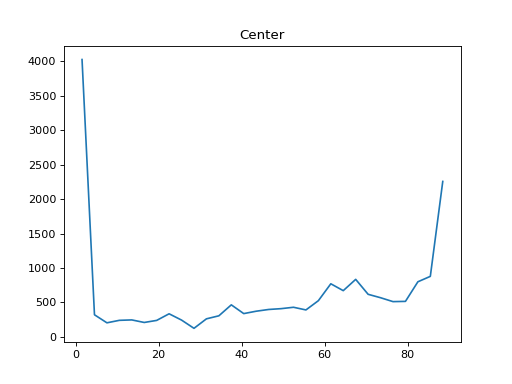

In [22]:
deriv_0 = ndimage.gaussian_filter1d(sample_data,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(sample_data,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
#polvec1 = polvec[40:70, 30:60]
dphi = abs(angle -  sample_polang)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
for i in range(len(dphi)):
    if dphi[i] > 90:
        dphi[i] = abs(dphi[i] - 180)   
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi , bins=30, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.title("Center")
plt.show()
plt.savefig("center_mask.pdf")

In [23]:
codes = [Path.MOVETO, Path.CURVE4*100]

In [24]:
codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

In [25]:
codes

[1, 4, 4, 4]

In [26]:
from matplotlib.path import Path

nx, ny = 142, 158
poly_verts = [(71.72, 118.534), (74.42, 95.47), (79.74, 84.18), (81.34, 65.97), (89.18, 71.62), (89.80, 97)
              ,(83.39, 113.4), (78.52, 124.5), (74.42, 122.92), (71.72, 118.534)]

# Create vertex coordinates for each grid cell...
# (<0,0> is at the top left of the grid in this system)
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()

points = np.vstack((x,y)).T
codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4, 
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4
         ]
path = Path(poly_verts, codes)
grid = path.contains_points(points)
grid = grid.reshape((ny,nx))

print (grid)
grid.shape

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


(158, 142)

In [27]:
sample_data = data1*grid
sample_polang = polfile[11].data*grid 

plt.figure(figsize=(8,8))
plt.imshow(sample_data, origin='lower',interpolation='gaussian',cmap=plt.cm.viridis)
plt.show()

<IPython.core.display.Javascript object>


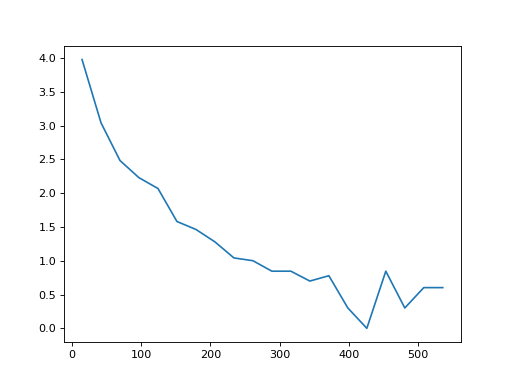

(158, 142)
(22436,)
(11304,)
20.2863143208
35.6602614188


In [28]:
plt.figure()
sample_data = data1.flatten()
print(data1.shape)
print(sample_data.shape)
m = np.where(np.isnan(sample_data) == False)
sample_data = sample_data[m]
print(sample_data.shape)
#sample_data = sample_data
hist, bins = np.histogram(sample_data, bins = 20)

center = (bins[:-1] + bins[1:])/2
plt.plot(center, np.log10(hist))
plt.show()
print(np.mean(sample_data))
print(np.std(sample_data))

In [29]:
hist

array([9468, 1095,  303,  169,  117,   38,   29,   19,   11,   10,    7,
          7,    5,    6,    2,    1,    7,    2,    4,    4], dtype=int64)

In [30]:
center

array([  14.48719145,   41.92509286,   69.36299427,   96.80089568,
        124.23879709,  151.6766985 ,  179.11459991,  206.55250132,
        233.99040273,  261.42830414,  288.86620555,  316.30410696,
        343.74200837,  371.17990978,  398.61781119,  426.0557126 ,
        453.49361401,  480.93151542,  508.36941683,  535.80731824])

In [31]:
bins

array([   0.76824074,   28.20614215,   55.64404356,   83.08194497,
        110.51984638,  137.95774779,  165.39564921,  192.83355062,
        220.27145203,  247.70935344,  275.14725485,  302.58515626,
        330.02305767,  357.46095908,  384.89886049,  412.3367619 ,
        439.77466331,  467.21256472,  494.65046613,  522.08836754,
        549.52626895])

In [32]:
data2 = data1.copy()
mask1 = data2 > 20
data2 = data2[mask1]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app


In [33]:
data2.shape

(2906,)

In [34]:
data2.resize((11, 5))

(55,) (55,)
(22,) (22,)


<IPython.core.display.Javascript object>


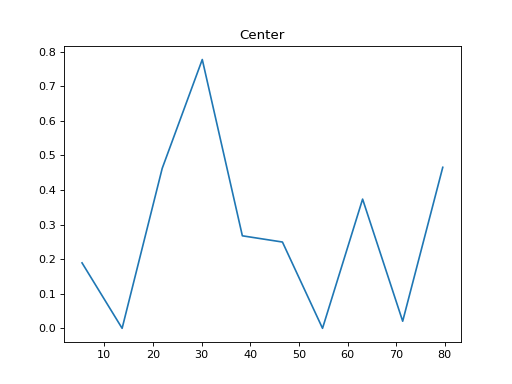

In [35]:
deriv_0 = ndimage.gaussian_filter1d(data2,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(data2,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
#angle = angle*(180./np.pi)
#polvec1 = polvec[40:70, 30:60]
sample_polang1 = polfile[11].data 
sample_polang1 = sample_polang1[mask1]
sample_polang1.resize((11, 5))
dphi = abs(angle -  sample_polang1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)
m = np.where(np.isnan(dphi) == False)
dphi = dphi[m]
grad = grad[m]
for i in range(len(dphi)):
    if dphi[i] > 90:
        dphi[i] = abs(dphi[i] - 180)   
#dphi = dphi[np.isnan(dphi) == False]
#grad = grad[np.isnan(grad) == False]
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
    #hist1 = np.histogram(grad,bins=20)
    #print hist, hist1
plt.plot(center,hist)
plt.title("Center")
plt.show()
plt.savefig("center_mask.pdf")

In [36]:
center.shape

(10,)

In [37]:
center

array([  5.42205663,  13.66141285,  21.90076907,  30.1401253 ,
        38.37948152,  46.61883774,  54.85819396,  63.09755018,
        71.3369064 ,  79.57626262])

In [38]:
hist

array([ 0.18920812,  0.        ,  0.46242335,  0.77726035,  0.26749968,
        0.24951091,  0.        ,  0.37360392,  0.02051294,  0.46558567])

In [133]:
data1 = polfile[0].data
data3 = data1.copy()
m1 = np.where( (data3 < 25) & (data3 > 0.7) ) 
sample_polang1 = polfile[11].data 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


(9211,) (9211,)
(5085,) (5085,)


<IPython.core.display.Javascript object>


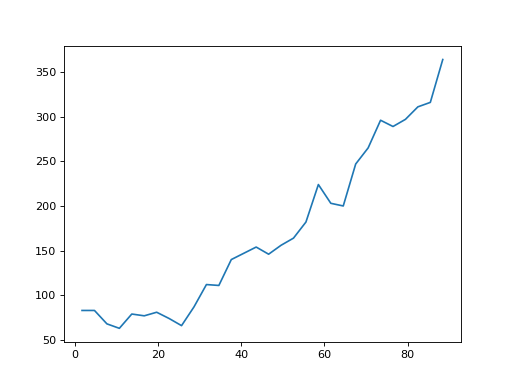

In [134]:
deriv_0 = ndimage.gaussian_filter1d(data3,3,axis=0,order=1)
deriv_1 = ndimage.gaussian_filter1d(data3,3,axis=1,order=1)
grad = np.sqrt(deriv_0**2 + deriv_1**2)
angle = np.arctan2(deriv_0,deriv_1)*(180./np.pi)
angle = angle[m1]
grad = grad[m1]
sample_polang1 = sample_polang1[m1]
dphi = abs(angle -  sample_polang1)
dphi = dphi.flatten()
grad = grad.flatten()
print(dphi.shape, grad.shape)

m2 = np.where(np.isnan(dphi) == False)
dphi = dphi[m2]
grad = grad[m2]
for i in range(len(dphi)):
    if dphi[i] > 90:
        dphi[i] = abs(dphi[i] - 180)   
print(dphi.shape, grad.shape)

plt.figure()
hist, bins = np.histogram(dphi, bins = 30) #, weights = grad)
center = (bins[:-1] + bins[1:]) / 2
plt.plot(center,hist)
#plt.title("Center")
plt.show()
#plt.savefig("center_mask.pdf")

data4 = data1.copy()

m = np.where(data3< (25+ 
#data3[m] = np.nan
sample_polang1 = polfile[11].data 
#sample_polang1[m] = np.nan
"""
for i in range(data3.shape[0]):
    for j in range(data3.shape[1]):
        if data3[i, j] < 250:
            data3[i, j] = np.nan
print(np.nanmin(data3))
print(np.nanmax(data3))
"""

In [75]:
m1

(array([], dtype=int64), array([], dtype=int64))

In [42]:
mask = (data4 > 20) & (data4 < 55)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [43]:
mask = (data4 >20) & (data4 <50)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [50]:
for i in np.arange(0.0, 1.0, 0.2):
    print(i)

0.0
0.2
0.4
0.6
0.8


In [100]:
m2 = np.where( (data3>25.98) & (data3<50.35) )

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [103]:
m3 = np.where( (data3 > 25) & (data3 < 0.7))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [104]:
len(m2[1])

1116

In [106]:
m4 = np.where((data3>0.7) & (data3<25))

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


In [107]:
m4

(array([  7,   7,   7, ..., 155, 156, 156], dtype=int64),
 array([40, 41, 42, ..., 81, 78, 79], dtype=int64))

In [108]:
len(m4[0])

9211

In [112]:
m1 = np.where( (data3 < 25) & (data3 > 0.7) ) 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [113]:
m1

(array([  7,   7,   7, ..., 155, 156, 156], dtype=int64),
 array([40, 41, 42, ..., 81, 78, 79], dtype=int64))

In [120]:
grad

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [121]:
grad[m1]

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

In [122]:
angle[m1]

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])